#Importo libreria

In [4]:
import json
import os
import urllib
import pandas as pd

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import matplotlib as mpl
import PIL
import IPython.display as display

from PIL import Image, ImageDraw
from PIL import Image # pip install Pillow
from PIL import ImageOps

#Creo directorios

In [5]:
# Directorios para los splits de


import os, shutil
base_dir = './'
os.makedirs(base_dir, exist_ok=True)

#dentro de fotos 
fotos_dir = os.path.join(base_dir, 'Fotos')
os.makedirs(fotos_dir, exist_ok=True)

In [2]:
base_dir

'./'

In [5]:
# Levanto archivo de relevamiento de usos del suelo de CABA


In [14]:
rus = pd.read_csv('rus.csv')

In [15]:
rus.TIPO_1.unique()

array(['LOTE', 'GAP', 'E', 'G', 'EP', 'L', 'U', 'EDU', 'SU', 'GA', 'P',
       'LG', 'ES', nan], dtype=object)

In [16]:
rus[rus.TIPO_1=='LOTE'].groupby('TIPO_2').size()


TIPO_2
ALQUILER COCHERAS MENSUALES     27
BAJO AUTOPISTA                 289
CALLE                            4
DEPOSITO                         6
LOTE                            89
OTROS                            9
PLAZA                           22
PLAZOLETA                       43
TERRENOS FERROVIARIOS            3
VIAS TREN                        9
dtype: int64

In [18]:
rus.head(5)

,Unnamed: 0,ID,SECCION,MANZANA,PARCELA,SM,SMP,UNIFICACIO,PARCELAS_U,CALLE_1,NUM,CALLE_2,TIPO_1,TIPO_2,PISOS,NOMBRE,D51,D41,D31,D21,BARRIO,COMUNA,ZONA,ANO,RAMA1,SUB_RAMA1,SS_RAMA1
0,0,5000104,95.0,025,010,095-025,095-025-010,U,001+002+003+004+005a+006+007+008+,RESERVISTAS ARGENTINOS,6580.0,NaN,LOTE,CALLE,0.0,ACCESO A AUTOPISTA PERITO MORENO,30.0,0.0,0.0,0.0,LINIERS,9.0,OESTE,2012.0,CALLE,CALLE,NaN
1,1,307969,54.0,045A,009,054-045A,054-045A-009,NaN,NaN,ZELADA,4312.0,NaN,GAP,GARAGE PRIVADO,1.0,NaN,17.0,0.0,0.0,0.0,VILLA LURO,10.0,OESTE,2011.0,GARAGE PRIVADO,GARAGE PRIVADO,NaN
2,2,397256,1.0,074,PLZ1,001-074,001-074-PLZ1,NaN,NaN,LA RABIDA (N) AV.,300.0,NaN,LOTE,PLAZA,0.0,NaN,16.0,0.0,0.0,0.0,SAN NICOLAS,1.0,CENTRO,2010.0,LOTE,PLAZA,NaN
3,3,268751,3.0,062C,002,003-062C,003-062C-002,NaN,NaN,"BUTTY, E., Ing.",195.0,NaN,GAP,GARAGE PRIVADO,1.0,NaN,17.0,0.0,0.0,0.0,RETIRO,1.0,CENTRO,2010.0,GARAGE PRIVADO,GARAGE PRIVADO,NaN
4,4,5002079,59.0,035,015a,059-035,059-035-015a,NaN,NaN,"TRELLES, MANUEL R.",1312.0,NaN,E,VIVIENDA,1.0,NaN,3.0,0.0,0.0,0.0,VILLA GRAL. MITRE,11.0,OESTE,2012.0,EDIFICIOS,VIVIENDA,NaN


In [19]:
rus.columns

Index(['Unnamed: 0', 'ID', 'SECCION', 'MANZANA', 'PARCELA', 'SM', 'SMP',
       'UNIFICACIO', 'PARCELAS_U', 'CALLE_1', 'NUM', 'CALLE_2', 'TIPO_1',
       'TIPO_2', 'PISOS', 'NOMBRE', 'D51', 'D41', 'D31', 'D21', 'BARRIO',
       'COMUNA', 'ZONA', 'ANO', 'RAMA1', 'SUB_RAMA1', 'SS_RAMA1'],
      dtype='object')

In [20]:
### Construye las categorías de las parcelas


rus.loc[(rus.TIPO_2 == 'VU - VIVIENDA UNICA')|(rus.TIPO_2 == 'VIVIENDA'), 'Vivienda'] = 1
rus.loc[(rus.TIPO_1=='E')&(rus.TIPO_2=='DEPARTAMENTOS'), 'Vivienda'] = 1
rus.loc[(rus.TIPO_2=='CASA'), 'Vivienda'] = 1
rus.loc[(rus.TIPO_1=='E')&(rus.TIPO_2)=='CASA', 'Vivienda'] = 1
rus.loc[(rus.TIPO_2=='CASA'), 'Vivienda'] = 1
rus.loc[(rus.Vivienda==1)&(rus.TIPO_2 == 'VU - VIVIENDA UNICA'), 'Vivienda'] = 1



rus.loc[(rus.TIPO_1=='E')&(rus.TIPO_2)=='OFICINAS', 'Oficinas'] = 1

rus.loc[(rus.TIPO_2=='LOTE')=='LOTE', 'Lote'] = 1
rus.loc[(rus.TIPO_1=='E')&(rus.RAMA1)=='LOTE', 'Lote'] = 1

rus.loc[(rus.TIPO_1=='EDU'), 'Público'] = 1
rus.loc[(rus.TIPO_1=='EP'), 'Industrial'] = 1
rus.loc[(rus.TIPO_1=='LOTE'), 'Lote'] = 1

rus.loc[(rus.RAMA1 == 'COMERCIO'), 'Comercial-Servicios'] = 1
rus.loc[(rus.TIPO_1=='L'), 'Comercial-Servicios'] = 1
rus.loc[(rus.TIPO_1=='LG'), 'Comercial-Servicios'] = 1
rus.loc[(rus.TIPO_1=='P'), 'Comercial-Servicios'] = 1
rus.loc[(rus.TIPO_2=='ESTACION DE SERVICIOS'), 'Comercial-Servicios'] = 1
rus.loc[(rus.TIPO_1=='SU')|(rus.TIPO_1=='G'), 'Comercial-Servicios'] = 1


rus.loc[(rus.TIPO_1 == 'GAP')|(rus.TIPO_2=='GARAGE PRIVADO')|(rus.TIPO_1=='GA'), 'Estacionamiento'] = 1

rus.loc[(rus.TIPO_1=='E')&(rus.TIPO_2)=='ABANDONADO', 'Abandonado-Obra'] = 1
rus.loc[(rus.TIPO_1=='GAP')&((rus.TIPO_2=='ABANDONADO')|(rus.TIPO_2=='CERRADO')|(rus.TIPO_2=='EN OBRA')), 'Abandonado-Obra'] = 1
rus.loc[(rus.TIPO_1=='GAP')&((rus.TIPO_2=='CERRADO')|(rus.TIPO_2=='EN OBRA')), 'Abandonado-Obra'] = 1
rus.loc[(rus.TIPO_2=='CERRADO'), 'Abandonado-Obra'] = 1 

### rus.loc[(rus.TIPO_1=='U')|(rus.TIPO_1=='G'), 'Comercial-Servicios'] = 1  ## No me queda claro como categorizar, ver si dejar o no

rus = rus.fillna(0)
rus.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,ID,SECCION,MANZANA,PARCELA,SM,SMP,UNIFICACIO,PARCELAS_U,CALLE_1,NUM,CALLE_2,TIPO_1,TIPO_2,PISOS,NOMBRE,D51,D41,D31,D21,BARRIO,COMUNA,ZONA,ANO,RAMA1,SUB_RAMA1,SS_RAMA1,Vivienda,Oficinas,Lote,Público,Industrial,Comercial-Servicios,Estacionamiento,Abandonado-Obra
0,0,5000104,95.0,025,010,095-025,095-025-010,U,001+002+003+004+005a+006+007+008+,RESERVISTAS ARGENTINOS,6580.0,0,LOTE,CALLE,0.0,ACCESO A AUTOPISTA PERITO MORENO,30.0,0.0,0.0,0.0,LINIERS,9.0,OESTE,2012.0,CALLE,CALLE,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,307969,54.0,045A,009,054-045A,054-045A-009,0,0,ZELADA,4312.0,0,GAP,GARAGE PRIVADO,1.0,0,17.0,0.0,0.0,0.0,VILLA LURO,10.0,OESTE,2011.0,GARAGE PRIVADO,GARAGE PRIVADO,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,397256,1.0,074,PLZ1,001-074,001-074-PLZ1,0,0,LA RABIDA (N) AV.,300.0,0,LOTE,PLAZA,0.0,0,16.0,0.0,0.0,0.0,SAN NICOLAS,1.0,CENTRO,2010.0,LOTE,PLAZA,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,268751,3.0,062C,002,003-062C,003-062C-002,0,0,"BUTTY, E., Ing.",195.0,0,GAP,GARAGE PRIVADO,1.0,0,17.0,0.0,0.0,0.0,RETIRO,1.0,CENTRO,2010.0,GARAGE PRIVADO,GARAGE PRIVADO,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5002079,59.0,035,015a,059-035,059-035-015a,0,0,"TRELLES, MANUEL R.",1312.0,0,E,VIVIENDA,1.0,0,3.0,0.0,0.0,0.0,VILLA GRAL. MITRE,11.0,OESTE,2012.0,EDIFICIOS,VIVIENDA,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
rus.columns

Index(['Unnamed: 0', 'ID', 'SECCION', 'MANZANA', 'PARCELA', 'SM', 'SMP',
       'UNIFICACIO', 'PARCELAS_U', 'CALLE_1', 'NUM', 'CALLE_2', 'TIPO_1',
       'TIPO_2', 'PISOS', 'NOMBRE', 'D51', 'D41', 'D31', 'D21', 'BARRIO',
       'COMUNA', 'ZONA', 'ANO', 'RAMA1', 'SUB_RAMA1', 'SS_RAMA1', 'Vivienda',
       'Oficinas', 'Lote', 'Público', 'Industrial', 'Comercial-Servicios',
       'Estacionamiento', 'Abandonado-Obra'],
      dtype='object')

### Creo la variable categoría

In [23]:


rus_agg = rus.groupby('SMP')['Vivienda','Oficinas', 'Lote', 'Público', 'Industrial', 'Comercial-Servicios', 'Estacionamiento', 'Abandonado-Obra', 'PISOS'].max().reset_index()


rus_agg.loc[(rus_agg.Vivienda==1)&(rus_agg.PISOS>3), 'Departamentos'] = 1
rus_agg.loc[(rus_agg.Vivienda==1)&(rus_agg.PISOS<=3), 'Casa-PH'] = 1

rus_agg = rus_agg.drop(['Vivienda', 'PISOS'], axis=1)


rus_agg['Categoria'] = ''

for x in ['Departamentos', 'Casa-PH', 'Oficinas', 'Lote', 'Público', 'Industrial', 'Comercial-Servicios', 'Estacionamiento', 'Abandonado-Obra']:
    rus_agg.loc[rus_agg[x]==1, 'Categoria'] = rus_agg.loc[rus_agg[x]==1, 'Categoria']+x+', '
        
rus_agg['Categoria'] = rus_agg['Categoria'].str[:-2]

rus_agg = rus_agg[rus_agg.Categoria!='']
rus_agg = rus_agg.sort_values('SMP').reset_index(drop=True)

rus_agg['web_ciudad'] = 'http://fotos.usig.buenosaires.gob.ar//getFoto?smp='+rus_agg.SMP.str[1:].str.upper()

rus_agg['file'] = rus_agg.SMP+'.jpg'
rus_path = os.path.join(fotos_dir, '')
rus_agg['filename'] = rus_path+rus_agg.SMP+'.jpg'
rus_agg['hay_foto']=0

rus_agg = rus_agg.fillna(0)



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [24]:
rus_agg = rus_agg[(rus_agg['Casa-PH'] == 1)|(rus_agg['Departamentos'] == 1)].reset_index(drop=True)

In [25]:
rus_agg

,SMP,Oficinas,Lote,Público,Industrial,Comercial-Servicios,Estacionamiento,Abandonado-Obra,Departamentos,Casa-PH,Categoria,web_ciudad,file,filename,hay_foto
0,001-021-012A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Departamentos,http://fotos.usig.buenosaires.gob.ar//getFoto?...,001-021-012A.jpg,./Fotos/001-021-012A.jpg,0
1,003-056-005G,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"Departamentos, Comercial-Servicios",http://fotos.usig.buenosaires.gob.ar//getFoto?...,003-056-005G.jpg,./Fotos/003-056-005G.jpg,0
2,003-056-009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"Departamentos, Comercial-Servicios",http://fotos.usig.buenosaires.gob.ar//getFoto?...,003-056-009.jpg,./Fotos/003-056-009.jpg,0
3,011-058-028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Departamentos,http://fotos.usig.buenosaires.gob.ar//getFoto?...,011-058-028.jpg,./Fotos/011-058-028.jpg,0
4,013-074-018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,013-074-018.jpg,./Fotos/013-074-018.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,089-040-001b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,089-040-001b.jpg,./Fotos/089-040-001b.jpg,0
8695,089-042-028b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,089-042-028b.jpg,./Fotos/089-042-028b.jpg,0
8696,089-066-033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,089-066-033.jpg,./Fotos/089-066-033.jpg,0
8697,095-025-026f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,095-025-026f.jpg,./Fotos/095-025-026f.jpg,0


In [26]:
ind = rus_agg.sample().index.values[0]
smp = rus_agg.loc[ind, 'SMP']
print(rus_agg.loc[ind, 'SMP'], rus_agg.loc[ind, 'Categoria'])
print(rus_agg.loc[ind, 'web_ciudad'])

rus.loc[rus.SMP==smp, ['SMP', 'TIPO_1', 'TIPO_2', 'RAMA1', 'SUB_RAMA1', 'SS_RAMA1', 'PISOS']]

065-079-006 Casa-PH, Estacionamiento
http://fotos.usig.buenosaires.gob.ar//getFoto?smp=65-079-006


,SMP,TIPO_1,TIPO_2,RAMA1,SUB_RAMA1,SS_RAMA1,PISOS
12536,065-079-006,GAP,GARAGE PRIVADO,GARAGE PRIVADO,GARAGE PRIVADO,0,1.0
12537,065-079-006,E,VIVIENDA,EDIFICIOS,VIVIENDA,0,1.0


In [27]:
rus_agg.Categoria.value_counts()

Casa-PH                                                         3614
Casa-PH, Estacionamiento                                        2342
Casa-PH, Comercial-Servicios                                    1203
Departamentos, Estacionamiento                                   425
Departamentos                                                    400
Departamentos, Comercial-Servicios                               363
Casa-PH, Comercial-Servicios, Estacionamiento                    184
Departamentos, Comercial-Servicios, Estacionamiento              141
Casa-PH, Público                                                   7
Casa-PH, Industrial                                                6
Casa-PH, Estacionamiento, Abandonado-Obra                          4
Casa-PH, Lote                                                      2
Casa-PH, Público, Estacionamiento                                  2
Casa-PH, Industrial, Estacionamiento                               2
Departamentos, Industrial, Comerci

In [28]:
len(rus_agg)

8699

In [29]:
rus_agg

,SMP,Oficinas,Lote,Público,Industrial,Comercial-Servicios,Estacionamiento,Abandonado-Obra,Departamentos,Casa-PH,Categoria,web_ciudad,file,filename,hay_foto
0,001-021-012A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Departamentos,http://fotos.usig.buenosaires.gob.ar//getFoto?...,001-021-012A.jpg,./Fotos/001-021-012A.jpg,0
1,003-056-005G,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"Departamentos, Comercial-Servicios",http://fotos.usig.buenosaires.gob.ar//getFoto?...,003-056-005G.jpg,./Fotos/003-056-005G.jpg,0
2,003-056-009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"Departamentos, Comercial-Servicios",http://fotos.usig.buenosaires.gob.ar//getFoto?...,003-056-009.jpg,./Fotos/003-056-009.jpg,0
3,011-058-028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Departamentos,http://fotos.usig.buenosaires.gob.ar//getFoto?...,011-058-028.jpg,./Fotos/011-058-028.jpg,0
4,013-074-018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,013-074-018.jpg,./Fotos/013-074-018.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,089-040-001b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,089-040-001b.jpg,./Fotos/089-040-001b.jpg,0
8695,089-042-028b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,089-042-028b.jpg,./Fotos/089-042-028b.jpg,0
8696,089-066-033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,089-066-033.jpg,./Fotos/089-066-033.jpg,0
8697,095-025-026f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,095-025-026f.jpg,./Fotos/095-025-026f.jpg,0


In [ ]:
i = rus_agg.loc[0]


1.0

# Descarga fotos directamente de Gobierno de CABA

In [65]:
import os.path
import urllib.request


ind = 0
x = 0
Casa = len(rus_agg[(rus_agg.hay_foto==1)&(rus_agg['Casa-PH']==1)])
Departamentos = len(rus_agg[(rus_agg.hay_foto==1)&(rus_agg['Departamentos']==1)])


while (Casa <1500)&(Departamentos<1500)&(ind<=len(rus_agg)):

    x += 1
    ind += 7
    
    if (ind<=len(rus_agg)):
    
        i = rus_agg.loc[ind]

        filename = i.filename       


        if ((Casa<=1000)&(i['Casa-PH']==1))|((Departamentos<=1000)&(i['Departamentos']==1)&(i['hay_foto'] != 1)):


            if not os.path.isfile(filename):
                try:
                    urllib.request.urlretrieve(i.web_ciudad, filename)

                    if os.path.exists(filename)&(len(rus_agg.Categoria)>0):
                        try:                  
                            frame = Image.open(filename)
                            rus_agg.loc[ind, 'hay_foto'] = 1

                            if i['Casa-PH']==1: Casa+=1
                            if i['Departamentos']==1: Departamentos+=1

                        except:   
                            os.remove(filename)
                except:
                    pass

rus_agg = rus_agg.fillna(0)
rus_agg = rus_agg[rus_agg.hay_foto==1].reset_index(drop=True)
            
rus_agg.to_pickle('rus_agg_con_categorias_y_fotos.p')

print('Fotos válidas', len(rus_agg), 'última parcela', ind  )

Fotos válidas 1797 última parcela 8701


In [66]:
Casa = len(rus_agg[(rus_agg.hay_foto==1)&(rus_agg['Casa-PH']==1)])
Departamentos = len(rus_agg[(rus_agg.hay_foto==1)&(rus_agg['Departamentos']==1)])
print(Casa, Departamentos)


1001 796



048-018-014           Casa-PH, Estacionamiento

http://fotos.usig.buenosaires.gob.ar//getFoto?smp=48-018-014
./Fotos/048-018-014.jpg


,SMP,TIPO_1,TIPO_2,RAMA1,SUB_RAMA1,SS_RAMA1,PISOS
19418,048-018-014,E,VIVIENDA,EDIFICIOS,VIVIENDA,0,1.0
19419,048-018-014,GAP,GARAGE PRIVADO,GARAGE PRIVADO,GARAGE PRIVADO,0,1.0


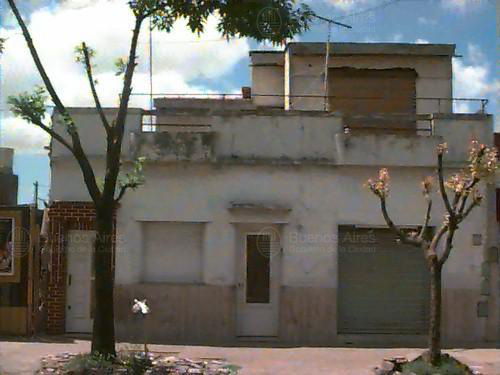

In [67]:
from IPython.display import display
ind = rus_agg.sample().index.values[0]
smp = rus_agg.loc[ind, 'SMP']
print('')
print(rus_agg.loc[ind, 'SMP'], '         ',rus_agg.loc[ind, 'Categoria'])
print('')
print(rus_agg.loc[ind, 'web_ciudad'])
fn = rus_agg.loc[ind, 'filename']
print(fn)

frame = Image.open(fn)

display(rus.loc[rus.SMP==smp, ['SMP', 'TIPO_1', 'TIPO_2', 'RAMA1', 'SUB_RAMA1', 'SS_RAMA1', 'PISOS']])

frame

In [ ]:
print(x)
len(rus_agg)

In [ ]:
ind